In [158]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [159]:
df = pd.read_csv('US National Health Expenditure Data.csv', header=1)
df.head(20)

,Expenditure Amount (Millions),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Total National Health Expenditures,"27,214","29,138","31,842","34,595","38,394","41,852","46,081","51,565","58,402",...,"2,295,307","2,399,121","2,495,414","2,598,823","2,689,349","2,797,260","2,879,008","3,026,157","3,200,815","3,337,248"
1,Out of pocket,"12,949","13,357","14,255","15,311","16,928","18,209","18,594","18,537","20,500",...,"290,000","295,184","293,723","299,742","309,973","318,330","325,189","330,068","339,315","352,537"
2,Health Insurance,"7,497","8,236","8,999","9,892","10,971","12,023","15,673","21,109","24,379",...,"1,609,250","1,695,968","1,796,424","1,876,922","1,950,187","2,022,904","2,087,804","2,228,136","2,382,770","2,486,842"
3,Private Health Insurance,"5,812","6,468","7,178","7,952","9,052","10,072","10,296","10,452","11,830",...,"776,176","802,857","832,906","864,344","898,631","928,211","946,398","999,940","1,068,778","1,123,372"
4,Medicare,-,-,-,-,-,-,"1,842","4,924","6,218",...,"432,751","466,971","498,859","519,787","544,679","569,634","590,163","618,889","648,808","672,093"
5,Medicaid (Title XIX),-,-,-,-,-,-,"1,304","3,141","3,541",...,"325,746","344,214","374,421","397,226","406,744","422,688","445,361","496,645","544,073","565,550"
6,Federal,-,-,-,-,-,-,632,"1,525","1,835",...,"185,485","203,084","247,326","266,360","247,125","243,251","256,907","305,106","343,123","358,095"
7,State and Local,-,-,-,-,-,-,672,"1,616","1,707",...,"140,261","141,129","127,094","130,865","159,619","179,438","188,454","191,540","200,951","207,454"
8,CHIP (Title XIX and Title XXI),-,-,-,-,-,-,-,-,-,...,"9,117","10,210","11,106","11,540","11,990","12,629","13,509","13,215","14,853","16,883"
9,Federal,-,-,-,-,-,-,-,-,-,...,"6,316","7,126","7,812","8,052","8,377","8,780","9,362","9,217","11,106","15,309"


In [160]:
# To print out the names of the columns
for i, v in enumerate(df.columns):
    print(i, v)

0 Expenditure Amount (Millions)
1 1960
2 1961
3 1962
4 1963
5 1964
6 1965
7 1966
8 1967
9 1968
10 1969
11 1970
12 1971
13 1972
14 1973
15 1974
16 1975
17 1976
18 1977
19 1978
20 1979
21 1980
22 1981
23 1982
24 1983
25 1984
26 1985
27 1986
28 1987
29 1988
30 1989
31 1990
32 1991
33 1992
34 1993
35 1994
36 1995
37 1996
38 1997
39 1998
40 1999
41 2000
42 2001
43 2002
44 2003
45 2004
46 2005
47 2006
48 2007
49 2008
50 2009
51 2010
52 2011
53 2012
54 2013
55 2014
56 2015
57 2016


In [161]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(542, 58)

In [162]:
# To make a copy of the data before further modifications/analysis
df_copy = df.copy()

In [163]:
df_copy.drop(df_copy.columns[[2, 25]], axis=1, inplace=True)

In [164]:
df_copy

,Expenditure Amount (Millions),1960,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Total National Health Expenditures,"27,214","31,842","34,595","38,394","41,852","46,081","51,565","58,402","65,923",...,"2,295,307","2,399,121","2,495,414","2,598,823","2,689,349","2,797,260","2,879,008","3,026,157","3,200,815","3,337,248"
1,Out of pocket,"12,949","14,255","15,311","16,928","18,209","18,594","18,537","20,500","22,601",...,"290,000","295,184","293,723","299,742","309,973","318,330","325,189","330,068","339,315","352,537"
2,Health Insurance,"7,497","8,999","9,892","10,971","12,023","15,673","21,109","24,379","27,565",...,"1,609,250","1,695,968","1,796,424","1,876,922","1,950,187","2,022,904","2,087,804","2,228,136","2,382,770","2,486,842"
3,Private Health Insurance,"5,812","7,178","7,952","9,052","10,072","10,296","10,452","11,830","13,363",...,"776,176","802,857","832,906","864,344","898,631","928,211","946,398","999,940","1,068,778","1,123,372"
4,Medicare,-,-,-,-,-,"1,842","4,924","6,218","7,045",...,"432,751","466,971","498,859","519,787","544,679","569,634","590,163","618,889","648,808","672,093"
5,Medicaid (Title XIX),-,-,-,-,-,"1,304","3,141","3,541","4,174",...,"325,746","344,214","374,421","397,226","406,744","422,688","445,361","496,645","544,073","565,550"
6,Federal,-,-,-,-,-,632,"1,525","1,835","2,298",...,"185,485","203,084","247,326","266,360","247,125","243,251","256,907","305,106","343,123","358,095"
7,State and Local,-,-,-,-,-,672,"1,616","1,707","1,877",...,"140,261","141,129","127,094","130,865","159,619","179,438","188,454","191,540","200,951","207,454"
8,CHIP (Title XIX and Title XXI),-,-,-,-,-,-,-,-,-,...,"9,117","10,210","11,106","11,540","11,990","12,629","13,509","13,215","14,853","16,883"
9,Federal,-,-,-,-,-,-,-,-,-,...,"6,316","7,126","7,812","8,052","8,377","8,780","9,362","9,217","11,106","15,309"


In [165]:
# this returns the total number of columns with NULL value
df_copy.isnull().sum().sum()

2548

In [166]:
# This is to rename the "Expenditure Amount (Millions)" column to "Expenditure" for ease of use
df_copy.rename(columns = {'Expenditure Amount (Millions)':'Expenditure'}, inplace=True)

In [167]:
# To drop the NULL values from the dataset
df_copy.dropna()
df_copy.head()

,Expenditure,1960,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Total National Health Expenditures,"27,214","31,842","34,595","38,394","41,852","46,081","51,565","58,402","65,923",...,"2,295,307","2,399,121","2,495,414","2,598,823","2,689,349","2,797,260","2,879,008","3,026,157","3,200,815","3,337,248"
1,Out of pocket,"12,949","14,255","15,311","16,928","18,209","18,594","18,537","20,500","22,601",...,"290,000","295,184","293,723","299,742","309,973","318,330","325,189","330,068","339,315","352,537"
2,Health Insurance,"7,497","8,999","9,892","10,971","12,023","15,673","21,109","24,379","27,565",...,"1,609,250","1,695,968","1,796,424","1,876,922","1,950,187","2,022,904","2,087,804","2,228,136","2,382,770","2,486,842"
3,Private Health Insurance,"5,812","7,178","7,952","9,052","10,072","10,296","10,452","11,830","13,363",...,"776,176","802,857","832,906","864,344","898,631","928,211","946,398","999,940","1,068,778","1,123,372"
4,Medicare,-,-,-,-,-,"1,842","4,924","6,218","7,045",...,"432,751","466,971","498,859","519,787","544,679","569,634","590,163","618,889","648,808","672,093"


In [168]:
df_copy.drop(df_copy.columns[1:46], axis=1, inplace=True)

In [169]:
df_copy

,Expenditure,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Total National Health Expenditures,"2,295,307","2,399,121","2,495,414","2,598,823","2,689,349","2,797,260","2,879,008","3,026,157","3,200,815","3,337,248"
1,Out of pocket,"290,000","295,184","293,723","299,742","309,973","318,330","325,189","330,068","339,315","352,537"
2,Health Insurance,"1,609,250","1,695,968","1,796,424","1,876,922","1,950,187","2,022,904","2,087,804","2,228,136","2,382,770","2,486,842"
3,Private Health Insurance,"776,176","802,857","832,906","864,344","898,631","928,211","946,398","999,940","1,068,778","1,123,372"
4,Medicare,"432,751","466,971","498,859","519,787","544,679","569,634","590,163","618,889","648,808","672,093"
5,Medicaid (Title XIX),"325,746","344,214","374,421","397,226","406,744","422,688","445,361","496,645","544,073","565,550"
6,Federal,"185,485","203,084","247,326","266,360","247,125","243,251","256,907","305,106","343,123","358,095"
7,State and Local,"140,261","141,129","127,094","130,865","159,619","179,438","188,454","191,540","200,951","207,454"
8,CHIP (Title XIX and Title XXI),"9,117","10,210","11,106","11,540","11,990","12,629","13,509","13,215","14,853","16,883"
9,Federal,"6,316","7,126","7,812","8,052","8,377","8,780","9,362","9,217","11,106","15,309"


In [179]:
# To drop the NULL values from the dataset
df_copy.dropna()
df_copy.head(10)

,Expenditure,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,Total National Health Expenditures,"2,295,307","2,399,121","2,495,414","2,598,823","2,689,349","2,797,260","2,879,008","3,026,157","3,200,815","3,337,248"
1,Out of pocket,"290,000","295,184","293,723","299,742","309,973","318,330","325,189","330,068","339,315","352,537"
2,Health Insurance,"1,609,250","1,695,968","1,796,424","1,876,922","1,950,187","2,022,904","2,087,804","2,228,136","2,382,770","2,486,842"
3,Private Health Insurance,"776,176","802,857","832,906","864,344","898,631","928,211","946,398","999,940","1,068,778","1,123,372"
4,Medicare,"432,751","466,971","498,859","519,787","544,679","569,634","590,163","618,889","648,808","672,093"
5,Medicaid (Title XIX),"325,746","344,214","374,421","397,226","406,744","422,688","445,361","496,645","544,073","565,550"
6,Federal,"185,485","203,084","247,326","266,360","247,125","243,251","256,907","305,106","343,123","358,095"
7,State and Local,"140,261","141,129","127,094","130,865","159,619","179,438","188,454","191,540","200,951","207,454"
8,CHIP (Title XIX and Title XXI),"9,117","10,210","11,106","11,540","11,990","12,629","13,509","13,215","14,853","16,883"
9,Federal,"6,316","7,126","7,812","8,052","8,377","8,780","9,362","9,217","11,106","15,309"


In [180]:
project = pd.DataFrame(df_copy)
project.to_csv("project_df.csv")

In [175]:
# This is to rename the "Years" column to "Year_(listed years)" for ease of use
df_copy.rename(columns = {'2007':'Year_2007','2008':'Year_2008','2009':'Year_2009','2010':'Year_2010','2011':'Year_2011','2012':'Year_2012','2013':'Year_2013','2014':'Year_2014','2015':'Year_2015','2016':'Year_2016'}, inplace=True)

In [176]:
df_copy.Year_2007 = df_copy.Year_2007.astype(float)
df_copy.Year_2008 = df_copy.Year_2008.astype(float)
df_copy.Year_2009 = df_copy.Year_2009.astype(float)
df_copy.Year_2010 = df_copy.Year_2010.astype(float)
df_copy.Year_2011 = df_copy.Year_2011.astype(float)
df_copy.Year_2012 = df_copy.Year_2012.astype(float)
df_copy.Year_2013 = df_copy.Year_2013.astype(float)
df_copy.Year_2014 = df_copy.Year_2014.astype(float)
df_copy.Year_2015 = df_copy.Year_2015.astype(float)
df_copy.Year_2016 = df_copy.Year_2016.astype(float)

ValueError: could not convert string to float: '8,435'

ValueError: scatter requires x column to be numeric

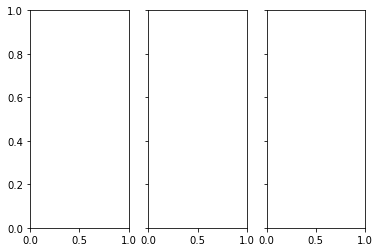

In [172]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df_copy.plot(kind='scatter', x='2016', y='Expenditure', ax=axs[0], figsize=(16, 8))
df_copy.plot(kind='scatter', x='2015', y='Expenditure', ax=axs[1])
df_copy.plot(kind='scatter', x='2014', y='Expenditure', ax=axs[2])
df_copy.plot(kind='scatter', x='2013', y='Expenditure', ax=axs[3])
df_copy.plot(kind='scatter', x='2012', y='Expenditure', ax=axs[4])
df_copy.plot(kind='scatter', x='2011', y='Expenditure', ax=axs[5])
df_copy.plot(kind='scatter', x='2010', y='Expenditure', ax=axs[6])
df_copy.plot(kind='scatter', x='2009', y='Expenditure', ax=axs[7])
df_copy.plot(kind='scatter', x='2008', y='Expenditure', ax=axs[8])
df_copy.plot(kind='scatter', x='2007', y='Expenditure', ax=axs[9])
df_copy.plot(kind='scatter', x='2006', y='Expenditure', ax=axs[10])